## Problem Statement
The goal of the project will be to build a robust generative search system capable of effectively and accurately answering questions from various policy documents. Using LlamaIndex to build the generative search application.

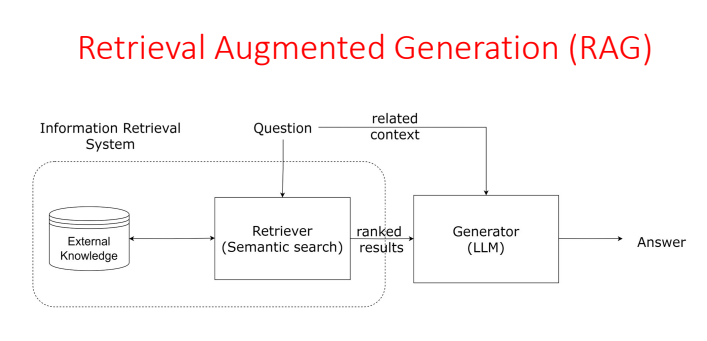

## Step 1 : Import the necessary libraries

In [2]:
!pip install llama-index

In [3]:
## Document loaders for SimpleDirectoryReader
!pip install docx2txt
!pip install pypdf
## Install openai
!pip install openai

In [4]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [5]:
from llama_index.core.evaluation import (
    CorrectnessEvaluator,
    FaithfulnessEvaluator,
    RelevancyEvaluator,
)
import re

## Step 2 : Set the API key from google cloab secrets

In [6]:
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

## Step 3 : Data Loading

In [7]:
!ls "/content/drive/MyDrive/HelpMate_AI_Support_Session/data"

HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
HDFC-Life-Group-Term-Life-Policy.pdf
HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
HDFC-Surgicare-Plan-101N043V01.pdf
uber_2021.pdf


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from llama_index.core import SimpleDirectoryReader
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/HelpMate_AI_Support_Session/data")

In [11]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 480 docs


In [12]:
type(documents)

list

In [13]:
documents[0]

Document(id_='ddc00929-7690-4a29-9fd4-ebd3294863a2', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2025-07-02', 'last_modified_date': '2024-11-29'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text=' \n \n            Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>> \n \nDear <<Policyholder’s Name>>,  \n \nSu

In [14]:
!pip install pymupdf

In [15]:
#Another method to load the documents
from pathlib import Path
from llama_index.readers.file import PyMuPDFReader
loader = PyMuPDFReader()
documents2 = loader.load(file_path=Path('/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf'))

In [16]:
type(documents2)

list

In [17]:
documents2[0]

Document(id_='6bf42304-0323-4b75-b615-a78824c105c1', embedding=None, metadata={'total_pages': 307, 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf', 'source': '1'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n____________________________________________ \nFORM 10-K\n____________________________________________ \n(Mark One)\n☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the fiscal year ended December 31, 2021\nOR\n☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from_____ to _____            \nCommission File Number: 001-38902\n____________________________________________ \nUBER TECHNOLOGIES, INC.\n(Exact n

## Core Components Of LlamaIndex

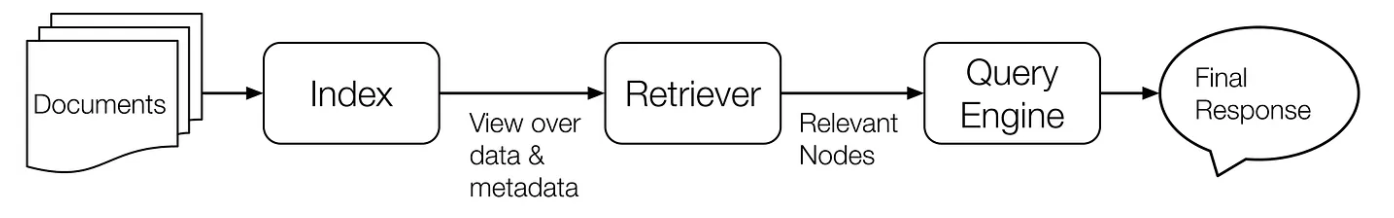

| **Component**            | **Role in LlamaIndex**                                   | **Analogy**                                 |
| ------------------------ | -------------------------------------------------------- | ------------------------------------------- |
| **Documents**            | Raw data you want to query                               | 📚 The **books** in your library            |
| **Index**                | Organizes and stores documents for efficient retrieval   | 🗂️ The **library shelves** organizing data |
| **Retriever**            | Finds the most relevant documents for a given query      | 🕵️ The **librarian** who fetches books     |
| **Response Synthesizer** | Combines retrieved info to generate a meaningful answer  | 🗣️ The **storyteller** crafting a response |
| **QueryEngine**          | Coordinates all components to process a query end-to-end | 🎬 The **director** orchestrating it all    |


## Step 4: Building the query engine
A Query Engine wraps a Retriever and a ResponseSynthesizer into a pipeline. It uses the query string to fetch nodes and then sends them to the Large Language Model (LLM) to generate a response.

In [18]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# build index
index = VectorStoreIndex(nodes)

# Construct Query Engine
query_engine = index.as_query_engine()

In [19]:
type(index)

llama_index.core.indices.vector_store.base.VectorStoreIndex

In [20]:
response = query_engine.query("What is the revenue of uber in 2021?")

In [21]:
type(response)

llama_index.core.base.response.schema.Response

In [22]:
## What are the options available with the response object
dir(response)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_formatted_sources',
 'metadata',
 'response',
 'source_nodes']

In [23]:
response.response

'The revenue of Uber in 2021 was $17,455 million.'

In [24]:
response.metadata

{'1ea56c2b-171a-44c2-baf1-45181e7f5fc2': {'page_label': '57',
  'file_name': 'uber_2021.pdf',
  'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf',
  'file_type': 'application/pdf',
  'file_size': 1880483,
  'creation_date': '2025-07-02',
  'last_modified_date': '2025-07-01'},
 'a6c4d2c2-0dbe-4822-a07a-70f919494620': {'page_label': '129',
  'file_name': 'uber_2021.pdf',
  'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf',
  'file_type': 'application/pdf',
  'file_size': 1880483,
  'creation_date': '2025-07-02',
  'last_modified_date': '2025-07-01'}}

In [25]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='1ea56c2b-171a-44c2-baf1-45181e7f5fc2', embedding=None, metadata={'page_label': '57', 'file_name': 'uber_2021.pdf', 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf', 'file_type': 'application/pdf', 'file_size': 1880483, 'creation_date': '2025-07-02', 'last_modified_date': '2025-07-01'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='ae5b3ee3-6c5b-454a-bfc0-203aeb065dff', node_type='4', metadata={'page_label': '57', 'file_name': 'uber_2021.pdf', 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf', 'file_type': 'application/pdf', 'file_size': 1880483, 'creation_date': '2025-07-02', 'last_modified_date': '202

In [26]:
#Extract the file name
response.source_nodes[0].node.metadata['file_name']

'uber_2021.pdf'

In [27]:
#Extract the file name and page number
response.source_nodes[0].node.metadata['file_name'] + " page no " + response.source_nodes[0].node.metadata['page_label']

'uber_2021.pdf page no 57'

In [28]:
#Extract the score
response.source_nodes[0].score

0.8696082171305894

In [ ]:
# Response node text
response.source_nodes[0].node.text

'The following table sets for\nth the components of our consolidated statements of operations for each of the periods presented as a percentage of revenue : Year Ended December 31,20202021 Revenue100 %100 %Costs and expensesCost of revenue, exclusive of depreciation and amortization shown separately below46 %54 %Operations and support16 %11 %Sales and marketing32 %27 %Research and development20 %12 %General and administrative24 %13 %Depreciation and amortization5 %5 %Total costs and expenses144 %122 %Loss from operations(44) %(22)%Interest expense(4) %(3) %Other income (expense), net(15) %19 %Loss before income taxes and loss from equity method investments(62) %(6) %Provision for (benefit from) income taxes(2) %(3) %Loss from equity method investments— %— %Net loss including non-controlling interests(61) %(3) %Less: net loss attributable to non-controlling interests, net of tax— %— %Net loss attributable to Uber Technologies, Inc.(61) %(3) % Totals of percentage of revenues may not foo

## Re-ranking

In [29]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 712.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [31]:
from llama_index.core.postprocessor import SentenceTransformerRerank

In [32]:
rerank = SentenceTransformerRerank(
    model="cross-encoder/ms-marco-MiniLM-L-2-v2", top_n=3
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/62.5M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [33]:
from llama_index.core import PromptTemplate

text_qa_template_str = (
    "You are a helpful assistant.\n\n"
    "Use the context information provided below, along with your own knowledge, to answer the user's question.\n\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n\n"
    "Question:\n{query_str}\n\n"
    "Answer the question based on the context. If the context isn't helpful, you can still answer the question using your general knowledge.\n"
)

text_qa_template = PromptTemplate(text_qa_template_str)

In [34]:
refine_template_str = (
    "You are a helpful assistant refining an earlier response.\n\n"
    "Original Question:\n{query_str}\n\n"
    "Existing Answer:\n{existing_answer}\n\n"
    "Additional Context:\n"
    "------------\n"
    "{context_msg}\n"
    "------------\n\n"
    "Using both the new context and your knowledge, refine or improve the existing answer. "
    "If the context does not add anything useful, you may repeat the original answer.\n"
)

refine_template = PromptTemplate(refine_template_str)


In [35]:
from llama_index.llms.openai import OpenAI
gpt_35llm = OpenAI(model="gpt-3.5-turbo", max_tokens=256)
gpt_4llm = OpenAI(model="gpt-4", max_tokens=256)# this will be used for evaluation

query_engine_RR = index.as_query_engine(
     similarity_top_k=5,
        node_postprocessors=[rerank],
        text_qa_template=text_qa_template,
        refine_template=refine_template,
        llm=gpt_35llm
)

In [36]:
response = query_engine_RR.query(
    "What is the revenue of uber in 2021?"
)

In [37]:
# Response node text
response.source_nodes[0].node.text

'The following table sets for\nth the components of our consolidated statements of operations for each of the periods presented as a percentage of revenue : Year Ended December 31,20202021 Revenue100 %100 %Costs and expensesCost of revenue, exclusive of depreciation and amortization shown separately below46 %54 %Operations and support16 %11 %Sales and marketing32 %27 %Research and development20 %12 %General and administrative24 %13 %Depreciation and amortization5 %5 %Total costs and expenses144 %122 %Loss from operations(44) %(22)%Interest expense(4) %(3) %Other income (expense), net(15) %19 %Loss before income taxes and loss from equity method investments(62) %(6) %Provision for (benefit from) income taxes(2) %(3) %Loss from equity method investments— %— %Net loss including non-controlling interests(61) %(3) %Less: net loss attributable to non-controlling interests, net of tax— %— %Net loss attributable to Uber Technologies, Inc.(61) %(3) % Totals of percentage of revenues may not foo

## Generating The Evaluators with LLM gpt-4

In [38]:
faithfulness_gpt4 = FaithfulnessEvaluator(llm=gpt_4llm)
relevancy_gpt4 = RelevancyEvaluator(llm=gpt_4llm)
correctness_gpt4 = CorrectnessEvaluator(llm=gpt_4llm)

### Creating a cache Layer

In [39]:
!pip install diskcache
import openai
import diskcache as dc

cache = dc.Cache('./gpt_cache')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00


In [40]:
cache.set("A", "answer")

True

In [41]:
print(cache.get("A"))

answer


## Step 6 - Creating a response Pipeline

In [44]:
## Query response function
def query_response(user_input):
    final_response = ""
    cache_response = cache.get(user_input)

    if cache_response is not None:
        print("Answer from cache:\n")
        return cache_response

    print("Answer from LLM:\n")

    response = query_engine_RR.query(user_input)

    # Evaluate the response using different dimensions
    faithfulness_result = faithfulness_gpt4.evaluate_response(response=response)
    relevancy_result = relevancy_gpt4.evaluate_response(query=user_input, response=response)
    correctness_result = correctness_gpt4.evaluate_response(query=user_input, response=response)

    # Get metadata for document source
    try:
        file_info = response.source_nodes[0].node.metadata
        file_name = f"{file_info.get('file_name', 'Unknown File')} Page No {file_info.get('page_label', 'N/A')}\n"
        similarity_score = response.source_nodes[1].score if len(response.source_nodes) > 1 else "N/A"
    except Exception as e:
        file_name = "Source document info not available.\n"
        similarity_score = "N/A"

    # Construct final response string
    final_response = (
        f"{response.response}\n\n"
        f"Check further at {file_name}"
        f"Similarity score: {similarity_score}\n"
        f"Faithfulness Score: {faithfulness_result.score}\n"
        f"Relevancy Score: {relevancy_result.score}\n"
        f"Correctness Score: {correctness_result.score}\n"
    )

    # Store in cache
    cache.set(user_input, final_response)

    return final_response


In [45]:
import nest_asyncio
nest_asyncio.apply()

In [46]:
print(query_response("What are the documents required to do the policy?"))

Answer from LLM:

The documents required to do the policy include:
a. Completed claim form (including NEFT details and bank account proof)
b. Member Information/Enrollment Form (MIF)
c. Separate Member Authorization (if applicable)
d. All medical reports for diagnosis and treatment of critical illness
e. All current and past medical records of Scheme Member
f. NEFT Details along with supporting documents of Insured member
g. Translation of all vernacular documents (if Required)

Check further at HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf Page No 16
Similarity score: -3.6004858016967773
Faithfulness Score: 1.0
Relevancy Score: 1.0
Correctness Score: 4.5



In [47]:
print(query_response("What is the revenue of uber in 2021?"))

Answer from LLM:

The revenue of Uber in 2021 was $17,455 million.

Check further at uber_2021.pdf Page No 57
Similarity score: 3.261845111846924
Faithfulness Score: 1.0
Relevancy Score: 1.0
Correctness Score: 4.5



In [61]:
def initialize_conv():
  print('Feel free to ask Questions regarding uber 2021 financial report. Type exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p>{response}</p>'))

In [60]:
initialize_conv()

Feel free to ask Questions regarding uber 2021 financial report. Type exit once you are done
What are different uber business
Answer from cache:



exit
Exiting the program... bye


In [62]:
questions = ['What was uber revenue in 2021?',
             "Which services gave uber the most revenue",
             'What was uber loss in 2021?']

### Build a Testing Pipeline

In [63]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    page = query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])
  return feedback_df

In [64]:
import pandas as pd

In [66]:
testing_pipeline(questions)

What was uber revenue in 2021?
Answer from LLM:

Uber's revenue in 2021 was $17.455 billion.

Check further at uber_2021.pdf Page No 53
Similarity score: 2.0605812072753906
Faithfulness Score: 1.0
Relevancy Score: 1.0
Correctness Score: 5.0


 Please provide your feedback on the response provided by the bot
good
Answer from cache:

Answer from cache:

Which services gave uber the most revenue
Answer from LLM:

Based on the information provided, the services that gave Uber the most revenue in 2021 were Delivery services, with a revenue of $8,362 million. This was followed by Mobility services with a revenue of $6,953 million. Freight services generated revenue of $2,132 million, and All Other revenue totaled $8 million. Therefore, Delivery services provided the highest revenue for Uber in 2021.

Check further at uber_2021.pdf Page No 98
Similarity score: -1.9523695707321167
Faithfulness Score: 1.0
Relevancy Score: 1.0
Correctness Score: 4.5


 Please provide your feedback on the respons

,Question,Response,Page,Good or Bad
0,What was uber revenue in 2021?,Uber's revenue in 2021 was $17.455 billion.\n\...,5.0,good
1,Which services gave uber the most revenue,"Based on the information provided, the service...",4.5,good
2,What was uber loss in 2021?,Uber's net loss in 2021 was $570 million.\n\nC...,5.0,bad


In [67]:
response = query_engine.query("Which services gave uber the most revenue?")

In [68]:
response.response

'Mobility services provided Uber with the most revenue.'

In [69]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='c0ac7ab6-a417-4472-a34b-f395a6f3c43f', embedding=None, metadata={'page_label': '98', 'file_name': 'uber_2021.pdf', 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf', 'file_type': 'application/pdf', 'file_size': 1880483, 'creation_date': '2025-07-02', 'last_modified_date': '2025-07-01'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='79ac62d5-7807-42ef-b990-8bc505f148ab', node_type='4', metadata={'page_label': '98', 'file_name': 'uber_2021.pdf', 'file_path': '/content/drive/MyDrive/HelpMate_AI_Support_Session/data/uber_2021.pdf', 'file_type': 'application/pdf', 'file_size': 1880483, 'creation_date': '2025-07-02', 'last_modified_date': '202

In [70]:
response.source_nodes[1].node.text

'PART I\nITEM 1. BUSINESSOverviewUber Technologies, Inc. (“Uber,” “we,” “our,” or “us”) is a technology platform that uses a massive network, leading technology, operational excellence andproduct expertise to power movement from point A to point B. We develop and operate proprietary technology applications supporting a variety of offerings onour  platform  (“platform(s)”  or  “Platform(s)”).  We  connect  consumers  (“Rider(s)”)  with  independent  providers  of  ride  services  (“Mobility  Driver(s)”)  forridesharing  services,  and  connect  Riders  and  other  consumers  (“Eater(s)”)  with  restaurants,  grocers  and  other  stores  (collectively,  “Merchants”)  with  deliveryservice  providers  (“Couriers”)  for  meal  preparation,  grocery  and  other  delivery  services.  Riders  and  Eaters  are  collectively  referred  to  as  “end-user(s)”  or“consumer(s).” Mobility Drivers and Couriers are collectively referred to as “Driver(s).” We also connect consumers with public transpor

In [74]:
reference_N0 = " Check further at " + response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label']
reference_N1 = " Check further at " + response.source_nodes[1].node.metadata['file_name'] + " Page No " + response.source_nodes[1].node.metadata['page_label']
retrieved = response.source_nodes[0].node.text + reference_N0 + response.source_nodes[1].node.text + reference_N1
print(retrieved)

Note 2 – Revenue
The  following  tables  present  our  revenues  disaggregated  by  offering  and  geographical  region.  Revenue  by  geographical  region  is  based  on  where  thetransaction occurred. This level of disaggregation takes into consideration how the nature, amount, timing, and uncertainty of revenue and cash flows are affectedby economic factors. Revenue is presented in the following tables for the years ended December 31, 2019, 2020 and 2021, respectively (in millions):Year Ended December 31, 20192020 2021 Mobility revenue $ 10,707 $6,089 $6,953 Delivery revenue 1,401 3,904 8,362 Freight revenue731 1,011 2,132 All Other revenue161 135 8 Total revenue$ 13,000 $11,139 $17,455  We offer subscription memberships to end-users including Uber One, Uber Pass, Rides Pass, and Eats Pass (“Subscription”). We recognize Subscriptionfees ratably over the life of the pass. We allocate Subscription fees earned to Mobility and Delivery revenue on a proportional basis, based on usage fo

### Building a custom prompt template¶

In [72]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""What services gave uber the most revenue? Check in '{retrieved}' """},
          ]

In [73]:
response2 = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response2.choices[0].message.content

"Based on the information provided in Note 2 regarding Uber's revenue disaggregated by offering, the services that gave Uber the most revenue for the year ended December 31, 2021 are as follows:\n\n1. Mobility revenue: $6,953 million\n2. Delivery revenue: $8,362 million\n3. Freight revenue: $2,132 million\n4. All Other revenue: $8 million\n\nTherefore, the Delivery service provided the most revenue for Uber in 2021, followed by Mobility and Freight services."

In [75]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

##Initialize the OpenAI model
Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

##Initialize the embedding model
Settings.embed_model = OpenAIEmbedding()

## Initialize the node_parser with the custom node settings
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)

## Initialize the num_output and the context window
Settings.num_output = 512
Settings.context_window = 3900

# Create a VectorStoreIndex from a list of documents using the service context
index = VectorStoreIndex.from_documents(documents)

# Initialize a query engine for the index with a specified similarity top-k value
query_engine = index.as_query_engine(similarity_top_k=3)

In [76]:
#Query the engine with a specific question
response = query_engine.query("What is the revenue of uber in 2021? Give the answer in billions")

In [77]:
response.response

'The revenue of Uber in 2021 was $17.455 billion.'

In [79]:
reference_C0 = " Check further at " + response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label']
reference_C1 = " Check further at " + response.source_nodes[1].node.metadata['file_name'] + " Page No " + response.source_nodes[1].node.metadata['page_label']
retrieved_c = response.source_nodes[0].node.text + reference_C0 + response.source_nodes[1].node.text + reference_C1
print(retrieved_c)

The following table sets for
th the components of our consolidated statements of operations for each of the periods presented as a percentage of revenue : Year Ended December 31,20202021 Revenue100 %100 %Costs and expensesCost of revenue, exclusive of depreciation and amortization shown separately below46 %54 %Operations and support16 %11 %Sales and marketing32 %27 %Research and development20 %12 %General and administrative24 %13 %Depreciation and amortization5 %5 %Total costs and expenses144 %122 %Loss from operations(44) %(22)%Interest expense(4) %(3) %Other income (expense), net(15) %19 %Loss before income taxes and loss from equity method investments(62) %(6) %Provision for (benefit from) income taxes(2) %(3) %Loss from equity method investments— %— %Net loss including non-controlling interests(61) %(3) %Less: net loss attributable to non-controlling interests, net of tax— %— %Net loss attributable to Uber Technologies, Inc.(61) %(3) % Totals of percentage of revenues may not foot 

In [81]:
messages_c = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""What is the right to call second opinion? Check in '{retrieved_c}' """},
          ]

In [82]:
response_c = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages_c)
response_c.choices[0].message.content

'The term "right to call a second opinion" generally refers to the right of a patient to seek an expert opinion from another medical professional about their health diagnosis or treatment plan. This is an important aspect of patient autonomy and allows individuals to ensure they are getting the best possible care.\n\nIn your message, you provided information from a financial statement for Uber Technologies, Inc., detailing their revenue, costs, expenses, and net loss over different fiscal years. This kind of information is highly relevant in a financial or corporate context but does not pertain to the concept of seeking a second medical opinion.\n\nIf you were looking for a specific context in which the term "right to call a second opinion" is used within a legal, financial, or corporate framework, please provide additional details so I can assist you accordingly!'